## CC421 FINAL EXAM 2023-II - PART1

![CC421-FINAL-2023-PART1](./images/CC421-FINAL-2023.1.jpg)

## QUESTION 1

Pseudo codigo

```
algorithm gradient_descent is
    input: 
        w0: initialization vector R^n
        a: learning rate
        max_iter: maximum iterations (default: 100)
        min_delta: tolerancia gradiente
    output:
        local minimum

    w <- w0
    MAX_ITER = max_iter
    MIN_DELTA = min_delta
    
    
    i = 0
    delta = 0 % step of gradient descent
    while i < MAX_ITER or delta < MIN_DELTA {
        gf = (1/n)*sum([grad(f)(w, xi) for i in range(n)]))
        t = w - a*gf
        delta = sum(abs(t-w))
        
        w = t
        i = i+1
    }
    
    return w
```

## QUESTION 2 and 3


| 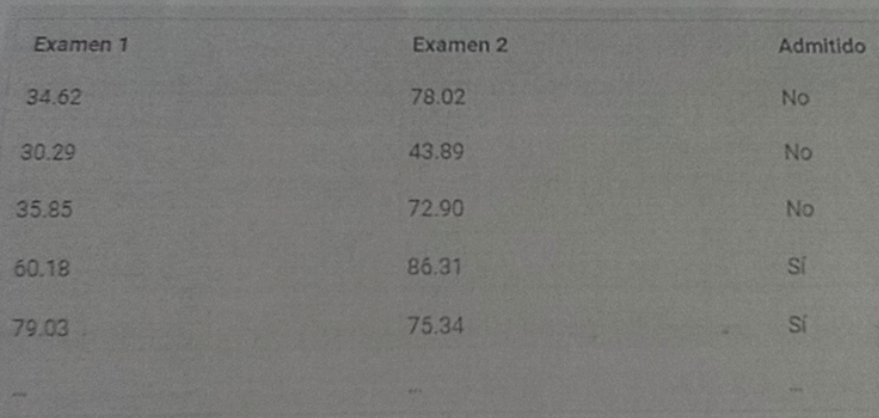 |
|:--:|
| Data |



Definiendo variables:

$$
x = [Examen 1, Examen 2] = [x1, x2],
y = Admitido (possible\_values: No=0, Si=1)
$$

## Regresion Logistica (RL)
REFENRENCE: https://en.wikipedia.org/wiki/Logistic_regression#Model

En nuestro caso $x\in R²$, por lo que la regresion logistica es:

$$f(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 + x_2)}} = \sigma(w.x +b)$$

Donde $w$ son los pesos de las variables ($w = [\beta_1, \beta_2])$ y $\beta = \beta_0$

**NOTA:** El objetivo de este ejercicio es encontrar los coeficientes de la **regresion logistica** ($\beta_0, \beta_1, \beta_2$) minimizando la funcion de costo usando la tecnica del **gradiente decendiente**

## Funcion costo
La funcion costo nos da una medida la "distancia" entre las predicciones de nuestro modelo y la data real, por lo que hay que realizar un proceso de optimizacion para encontrar los **parametros optimos** del modelo que se esta usando (en este caso una **regresion logistica**)

> REFERENCE: https://en.wikipedia.org/wiki/Loss_function
>
> loss function or cost function (sometimes also called an error function) [1] is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function.


REFERENCE: https://www.web.stanford.edu/~jurafsky/slp3/5.pdf

NOTA: Incluire un archivo llamado **logistic_regression.pdf** (en caso no puedas acceder al link anterior.


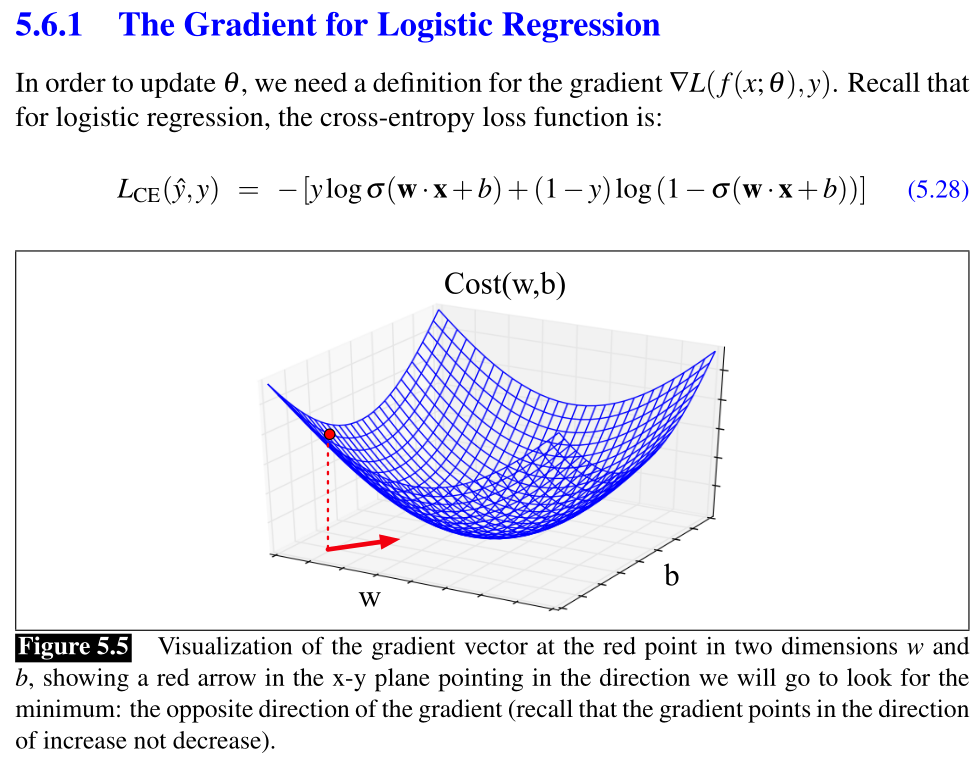 

##  Gradiente de la funcion costo 

Aplicaremos el metodo **decenso de gradiente** a la funcion costo definida, para encontra los coeficientes optimos de la regresion logistica ($w$ y $b$).


Antes de calcular $\nabla L_{CE}$, recuerda que la gradiente de una funcion se calcula de la siguiente manera:

REFERENCE: https://en.wikipedia.org/wiki/Gradient
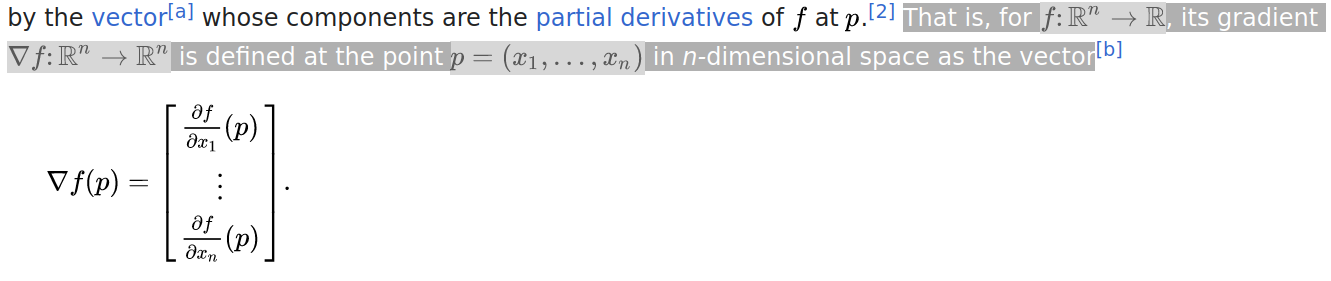

 Derivadas parciales respecto a los pesos.
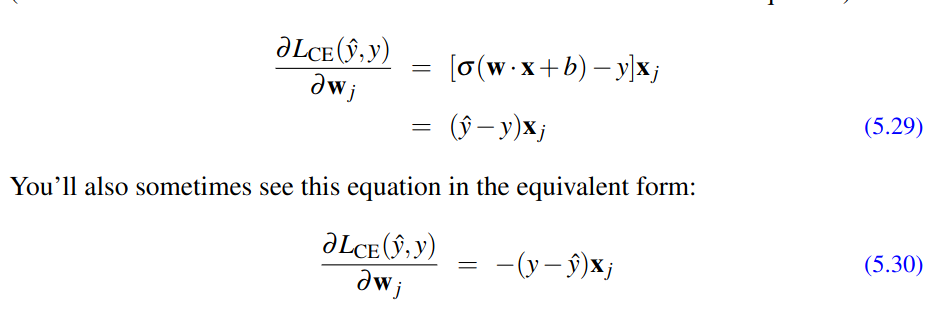

Que es $\hat{y}$?

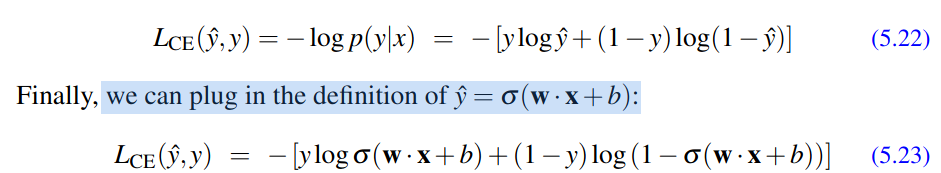


Finalmente el gradiente de la funcion costo es:
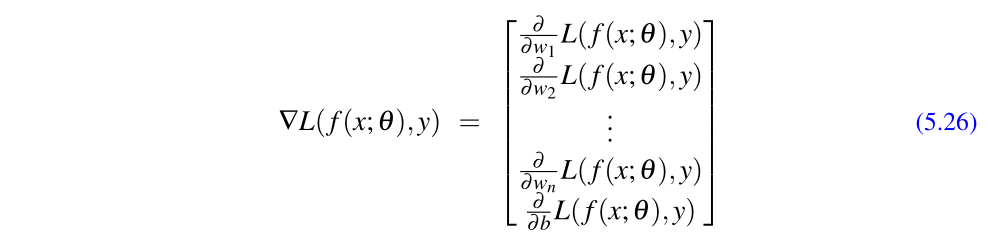

## Metodo de gradiente

REFERENCE: https://www.web.stanford.edu/~jurafsky/slp3/5.pdf

$n$: learning rate

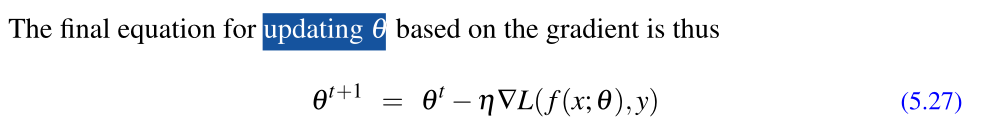

In [3]:
### pasos del descenso de gradiente 
import numpy as np

def logistic_regresion(x:np.array, theta: np.array, verbose: bool = False) -> float: # f(x, theta) (ecuacion 5.27)
    # theta = [w0, w1, b]
    w = theta[:-1]
    b = theta[-1]
    z = np.inner(x, w) + b

    y = 1/(1+np.exp(z))
    
        
    if verbose:
        print(f"w: {w}, b: {b}, z:{z}, y: {y}")
        
    return y

def grad_loss_function(x: np.array, y: float, theta: np.array, verbose: bool = False) -> np.array:
    """
    Calcula el gradiente de la funcion costo de la regresion logistica
    """
    
    yy = logistic_regresion(x, theta) # b no importa en el calculo de derivadas parciales (ecuacion 5.30)
    
    w = theta[:-1]
    b = theta[-1]
    
    # ecuacion 5.30
    dw = np.array([-(y-yy)*xi for xi in x]) # partial derivated of cost function respect to w
    db = yy-y # partial derivated of cost function respect to b
    
    if verbose:
        print(f"dw: {dw}, db: {db}")
        
    #import pdb; pdb.set_trace()
    
    # NOTA: derivada parcialde funcion costo respecto a b es yy -y (check ejemplo en section 5.6.3)
    
    return np.append(dw, db) # partial derivated of cost function respect to theta (theta = [w, b])
    

# datos pasos del descenso de gradiente
#Z = [Examen1 , Examen2, Admitido]
Z = np.array([
    [34.62, 78.02, 0],
    [30.29, 43.89, 0],
    [35.85, 72.90, 0],
    [60.18, 86.31, 1],
    [79.03, 75.34, 1]
])

x = Z[:, :2]
y = Z[:, 2]

MAX_ITER=5 # maximo numero de pasos del desenso de gradiente
MIN_DELTA=10**-3


theta = np.array([0, 0, 0]) # [w0, w1, b]
n = 1 # learning rate

i = 0
delta = 0.0

while i < MAX_ITER or  delta < MIN_DELTA:
    grad = grad_loss_function(x[0, :], y[0], theta, verbose=True)
    
    tt = theta - n*grad # ecuacion 5.27
    
    print(f"(step {i}) theta: {theta}")
    
    delta = np.sum(np.abs(tt-theta))
    
    theta = tt
    i += 1

dw: [17.31 39.01], db: 0.5
(step 0) theta: [0 0 0]
dw: [34.62 78.02], db: 1.0
(step 1) theta: [-17.31 -39.01  -0.5 ]
dw: [34.62 78.02], db: 1.0
(step 2) theta: [ -51.93 -117.03   -1.5 ]
dw: [34.62 78.02], db: 1.0
(step 3) theta: [ -86.55 -195.05   -2.5 ]
dw: [34.62 78.02], db: 1.0
(step 4) theta: [-121.17 -273.07   -3.5 ]
